In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Library**

In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import joblib

from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#Load The Data

In [ ]:
# import data
df_ori = pd.read_excel('/content/drive/MyDrive/Training Machine Learning/Tugas Akhir/Dataset/Dataset_After_Cleaning.xlsx')

# duplicate data
df = df_ori.copy()

# show df
df

,filler_temperature,filler_bowl_pressure,filler_bowl_level,product_infeed_pressure,co2_supply_pressure,buffer_tank_temperature,head_tank_pressure,gas_volume_product_in_buffer_tank_nami,label
0,19.95,4.56,26.56,5.58,10.11,16.00,4.64,3.31,OK
1,20.24,4.31,39.40,5.59,10.13,15.96,4.67,3.31,OK
2,20.25,4.29,39.62,5.58,10.12,15.96,4.65,3.31,OK
3,20.26,4.30,39.54,5.55,10.12,15.93,4.64,3.31,OK
4,20.98,4.46,30.70,5.14,10.37,16.84,4.48,3.29,OK
...,...,...,...,...,...,...,...,...,...
16529,16.85,4.65,35.27,5.04,9.19,17.32,2.08,3.20,NG
16530,16.87,4.39,31.88,5.01,9.19,17.36,2.08,3.20,NG
16531,17.01,4.70,0.00,1.70,1.79,25.85,1.21,0.00,NG
16532,17.01,0.88,0.00,1.81,1.78,26.57,1.08,0.00,NG


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   filler_temperature                      16534 non-null  float64
 1   filler_bowl_pressure                    16534 non-null  float64
 2   filler_bowl_level                       16534 non-null  float64
 3   product_infeed_pressure                 16534 non-null  float64
 4   co2_supply_pressure                     16534 non-null  float64
 5   buffer_tank_temperature                 16534 non-null  float64
 6   head_tank_pressure                      16534 non-null  float64
 7   gas_volume_product_in_buffer_tank_nami  16534 non-null  float64
 8   label                                   16534 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,filler_temperature,filler_bowl_pressure,filler_bowl_level,product_infeed_pressure,co2_supply_pressure,buffer_tank_temperature,head_tank_pressure,gas_volume_product_in_buffer_tank_nami
count,16534.000000,16534.000000,16534.000000,16534.000000,16534.000000,16534.000000,16534.000000,16534.000000
mean,17.363222,4.404775,30.383276,5.182964,9.993999,16.271963,4.304688,3.192778
std,1.006891,0.161522,4.164438,0.301643,0.443594,1.155978,0.304626,0.214900
min,15.670000,-0.140000,0.000000,-0.470000,0.140000,14.490000,0.370000,0.000000
25%,16.570000,4.350000,29.570000,5.060000,10.010000,15.420000,4.200000,3.200000
50%,17.560000,4.400000,29.920000,5.150000,10.040000,16.480000,4.280000,3.200000
75%,18.050000,4.440000,30.360000,5.320000,10.060000,17.000000,4.450000,3.210000
max,55.470000,5.080000,293.500000,7.170000,10.440000,67.080000,4.790000,3.310000


In [ ]:
df.isnull().sum()

,0
filler_temperature,0
filler_bowl_pressure,0
filler_bowl_level,0
product_infeed_pressure,0
co2_supply_pressure,0
buffer_tank_temperature,0
head_tank_pressure,0
gas_volume_product_in_buffer_tank_nami,0
label,0


#Distribusi Label

In [ ]:
print("Distribusi Label:")
print(df['label'].value_counts())

Distribusi Label:
label
OK    14998
NG     1536
Name: count, dtype: int64


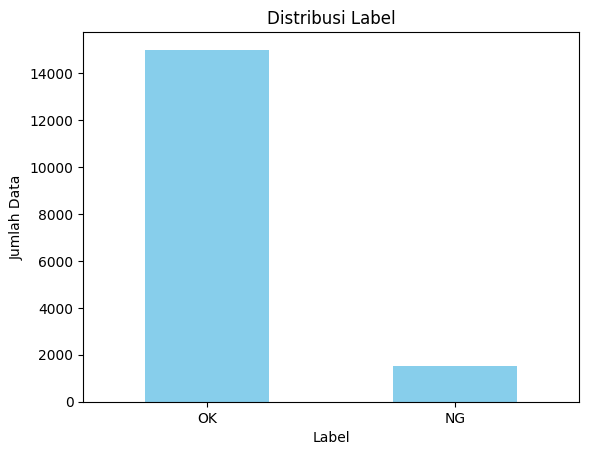

In [ ]:
# Distribusi label
df['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribusi Label")
plt.xlabel("Label")
plt.ylabel("Jumlah Data")
plt.xticks(rotation=0)
plt.show()

#Feature Engineering

**Split between X dan y**

In [ ]:
X = df.drop(['label'],axis=1)
y = df.label
y

,label
0,OK
1,OK
2,OK
3,OK
4,OK
...,...
16529,NG
16530,NG
16531,NG
16532,NG


**Konversi Label ke Format Numerik**

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

**Split Data Menjadi Train dan Test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

#Klasifikasi Oversampling

##Pipeline dengan SMOTE dan Random Forest --> **Cara 1**

In [ ]:
# Pipeline dengan SMOTE dan Random Forest
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

# Definisikan parameter untuk GridSearch
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           cv=3, scoring='f1', verbose=2, n_jobs=-1)

# Latih model
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 200}


**Evaluasi dan Simpan Model**

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Simpan model terbaik
#joblib.dump(best_model, "best_model.joblib")


Classification Report:
              precision    recall  f1-score   support

          NG       0.26      0.10      0.14       307
          OK       0.91      0.97      0.94      3000

    accuracy                           0.89      3307
   macro avg       0.59      0.53      0.54      3307
weighted avg       0.85      0.89      0.87      3307



##Pipeline dengan SMOTE dan Random Forest --> **Cara 2: Pengaturan ulang parameter SMOTE**

In [ ]:
# Pipeline dengan SMOTE dan Random Forest
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

# Definisikan parameter untuk GridSearch
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           cv=3, scoring='f1', verbose=2, n_jobs=-1)

# Latih model
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 200}


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Simpan model terbaik
#joblib.dump(best_model, "best_model.joblib")


Classification Report:
              precision    recall  f1-score   support

          NG       0.26      0.10      0.14       307
          OK       0.91      0.97      0.94      3000

    accuracy                           0.89      3307
   macro avg       0.59      0.53      0.54      3307
weighted avg       0.85      0.89      0.87      3307



##Pipeline dengan SMOTE dan Random Forest --> **Cara 3: Mengubah Penyeimbangan Kelas di Model**

In [ ]:
# Pipeline dengan SMOTE dan Random Forest
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Definisikan parameter untuk GridSearch
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           cv=3, scoring='f1', verbose=2, n_jobs=-1)

# Latih model
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 200}


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Simpan model terbaik
#joblib.dump(best_model, "best_model.joblib")


Classification Report:
              precision    recall  f1-score   support

          NG       0.26      0.10      0.14       307
          OK       0.91      0.97      0.94      3000

    accuracy                           0.89      3307
   macro avg       0.59      0.53      0.54      3307
weighted avg       0.85      0.89      0.87      3307



##**Cara 4: Menggunakan Model Lain -> XGBoost**

In [ ]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # Opsional, jika ingin menggunakan SMOTE
    ('model', XGBClassifier(scale_pos_weight=10, random_state=42))  # scale_pos_weight menyesuaikan ketidakseimbangan kelas
])

# Definisikan parameter untuk GridSearch
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 6, 10],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
    'model__scale_pos_weight': [1, 10, 50]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           cv=3, scoring='f1', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__scale_pos_weight': 10, 'model__subsample': 0.8}


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Simpan model terbaik
#joblib.dump(best_model, "best_model.joblib")


Classification Report:
              precision    recall  f1-score   support

          NG       0.00      0.00      0.00       307
          OK       0.91      1.00      0.95      3000

    accuracy                           0.91      3307
   macro avg       0.45      0.50      0.48      3307
weighted avg       0.82      0.91      0.86      3307



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##**Cara 5: Menggunakan Model Lain -> AdaBoost**

In [ ]:
# Pipeline dengan SMOTE dan AdaBoostClassifier
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # Oversampling kelas minoritas
    ('model', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=42))
])

# Parameter grid untuk pencarian parameter terbaik
param_grid = {
    'model__n_estimators': [50, 100, 200],        # Jumlah pohon dalam ensemble
    'model__learning_rate': [0.01, 0.1, 0.5],     # Kecepatan pembelajaran
    'model__estimator__max_depth': [1, 2, 3, 4],  # Kedalaman maksimal pohon
    'model__estimator__min_samples_split': [2, 5], # Minimal sampel untuk split
    'model__estimator__min_samples_leaf': [1, 2],  # Minimal sampel untuk daun pohon
    'model__estimator__max_features': [None, 'sqrt', 'log2'] # Jumlah fitur yang digunakan
}

# GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           cv=3, scoring='f1', verbose=2, n_jobs=-1)

# Latih model
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters: {'model__estimator__max_depth': 3, 'model__estimator__max_features': 'log2', 'model__estimator__min_samples_leaf': 2, 'model__estimator__min_samples_split': 2, 'model__learning_rate': 0.1, 'model__n_estimators': 100}


In [ ]:
# Evaluasi model terbaik pada data test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Simpan model terbaik
joblib.dump(best_model, "best_model.joblib")


Classification Report:
              precision    recall  f1-score   support

          NG       0.17      0.01      0.01       307
          OK       0.91      1.00      0.95      3000

    accuracy                           0.90      3307
   macro avg       0.54      0.50      0.48      3307
weighted avg       0.84      0.90      0.86      3307



['best_model.joblib']

#**Klasifikasi Undersampling**

##Pipeline dengan RandomUnderSampler dan Random Forest

In [ ]:
pipeline = Pipeline([
    ('undersample', RandomUnderSampler(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

# Definisikan parameter untuk GridSearch
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           cv=3, scoring='f1', verbose=2, n_jobs=-1)

# Latih model
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 50}


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Simpan model terbaik
joblib.dump(best_model, "best_model_undersampling_randomforest.joblib")


Classification Report:
              precision    recall  f1-score   support

          NG       0.12      0.58      0.19       307
          OK       0.93      0.54      0.69      3000

    accuracy                           0.55      3307
   macro avg       0.52      0.56      0.44      3307
weighted avg       0.85      0.55      0.64      3307



['best_model_oversampling_randomforest.joblib']

In [ ]:
# Generate probabilities
y_pred_prob = best_model.predict_proba(X_test)

# Adjust predictions based on thresholds
thresholds = np.arange(0.1, 0.9, 0.1)
for thresh in thresholds:
    y_pred_adjusted = (y_pred_prob[:, 1] > thresh).astype(int)
    print(f"\nClassification Report untuk Threshold {thresh:.1f}:")
    print(classification_report(y_test, y_pred_adjusted, target_names=label_encoder.classes_))


Classification Report untuk Threshold 0.1:
              precision    recall  f1-score   support

          NG       0.33      0.00      0.01       307
          OK       0.91      1.00      0.95      3000

    accuracy                           0.91      3307
   macro avg       0.62      0.50      0.48      3307
weighted avg       0.85      0.91      0.86      3307


Classification Report untuk Threshold 0.2:
              precision    recall  f1-score   support

          NG       0.22      0.01      0.01       307
          OK       0.91      1.00      0.95      3000

    accuracy                           0.91      3307
   macro avg       0.56      0.50      0.48      3307
weighted avg       0.84      0.91      0.86      3307


Classification Report untuk Threshold 0.3:
              precision    recall  f1-score   support

          NG       0.07      0.01      0.02       307
          OK       0.91      0.98      0.94      3000

    accuracy                           0.89      3

In [ ]:
## Setelah model dilatih
y_pred_prob = grid_search.best_estimator_.predict_proba(X_test)

# Menurunkan threshold untuk kelas "NG" (misalnya 0.8)
y_pred_adjusted = (y_pred_prob[:, 1] > 0.5).astype(int)

# Evaluasi model dengan threshold yang disesuaikan
print(classification_report(y_test, y_pred_adjusted, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

          NG       0.12      0.58      0.19       307
          OK       0.93      0.54      0.69      3000

    accuracy                           0.55      3307
   macro avg       0.52      0.56      0.44      3307
weighted avg       0.85      0.55      0.64      3307



##Pipeline dengan RandomUnderSampler dan XGBoost

In [ ]:
pipeline = Pipeline([
    ('undersample', RandomUnderSampler(random_state=42)),
    ('model', XGBClassifier(scale_pos_weight=10, random_state=42))  # scale_pos_weight menyesuaikan ketidakseimbangan kelas
])

# Definisikan parameter untuk GridSearch
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 6, 10],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
    'model__scale_pos_weight': [1, 10, 50]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           cv=3, scoring='f1', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 50, 'model__scale_pos_weight': 10, 'model__subsample': 0.8}


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Simpan model terbaik
#joblib.dump(best_model, "best_model.joblib")


Classification Report:
              precision    recall  f1-score   support

          NG       0.00      0.00      0.00       307
          OK       0.91      1.00      0.95      3000

    accuracy                           0.91      3307
   macro avg       0.45      0.50      0.48      3307
weighted avg       0.82      0.91      0.86      3307



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Generate probabilities
y_pred_prob = best_model.predict_proba(X_test)

# Adjust predictions based on thresholds
thresholds = np.arange(0.1, 0.9, 0.1)
for thresh in thresholds:
    y_pred_adjusted = (y_pred_prob[:, 1] > thresh).astype(int)
    print(f"\nClassification Report untuk Threshold {thresh:.1f}:")
    print(classification_report(y_test, y_pred_adjusted, target_names=label_encoder.classes_))


Classification Report untuk Threshold 0.1:
              precision    recall  f1-score   support

          NG       0.00      0.00      0.00       307
          OK       0.91      1.00      0.95      3000

    accuracy                           0.91      3307
   macro avg       0.45      0.50      0.48      3307
weighted avg       0.82      0.91      0.86      3307


Classification Report untuk Threshold 0.2:
              precision    recall  f1-score   support

          NG       0.00      0.00      0.00       307
          OK       0.91      1.00      0.95      3000

    accuracy                           0.91      3307
   macro avg       0.45      0.50      0.48      3307
weighted avg       0.82      0.91      0.86      3307


Classification Report untuk Threshold 0.3:
              precision    recall  f1-score   support

          NG       0.00      0.00      0.00       307
          OK       0.91      1.00      0.95      3000

    accuracy                           0.91      3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
## Setelah model dilatih
y_pred_prob = grid_search.best_estimator_.predict_proba(X_test)

# Menurunkan threshold untuk kelas "NG" (misalnya 0.8)
y_pred_adjusted = (y_pred_prob[:, 1] > 0.8).astype(int)

# Evaluasi model dengan threshold yang disesuaikan
print(classification_report(y_test, y_pred_adjusted, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

          NG       0.15      0.02      0.03       307
          OK       0.91      0.99      0.95      3000

    accuracy                           0.90      3307
   macro avg       0.53      0.50      0.49      3307
weighted avg       0.84      0.90      0.86      3307



##Pipeline dengan RandomUnderSampler dan ADABoost

In [ ]:
pipeline = Pipeline([
    ('undersample', RandomUnderSampler(random_state=42)),
    ('model', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=42))
])

# Parameter grid untuk pencarian parameter terbaik
param_grid = {
    'model__n_estimators': [50, 100, 200],        # Jumlah pohon dalam ensemble
    'model__learning_rate': [0.01, 0.1, 0.5],     # Kecepatan pembelajaran
    'model__estimator__max_depth': [1, 2, 3, 4],  # Kedalaman maksimal pohon
    'model__estimator__min_samples_split': [2, 5], # Minimal sampel untuk split
    'model__estimator__min_samples_leaf': [1, 2],  # Minimal sampel untuk daun pohon
    'model__estimator__max_features': [None, 'sqrt', 'log2'] # Jumlah fitur yang digunakan
}

# GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           cv=3, scoring='f1', verbose=2, n_jobs=-1)

# Latih model
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best Parameters: {'model__estimator__max_depth': 1, 'model__estimator__max_features': 'log2', 'model__estimator__min_samples_leaf': 1, 'model__estimator__min_samples_split': 2, 'model__learning_rate': 0.1, 'model__n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Simpan model terbaik
joblib.dump(best_model, "best_model_undersampling_adaboost.joblib")


Classification Report:
              precision    recall  f1-score   support

          NG       0.10      0.51      0.17       307
          OK       0.92      0.55      0.69      3000

    accuracy                           0.55      3307
   macro avg       0.51      0.53      0.43      3307
weighted avg       0.84      0.55      0.64      3307



['best_model_undersampling_adaboost.joblib']

In [ ]:
# Generate probabilities
y_pred_prob = best_model.predict_proba(X_test)

# Adjust predictions based on thresholds
thresholds = np.arange(0.1, 0.9, 0.1)
for thresh in thresholds:
    y_pred_adjusted = (y_pred_prob[:, 1] > thresh).astype(int)
    print(f"\nClassification Report untuk Threshold {thresh:.1f}:")
    print(classification_report(y_test, y_pred_adjusted, target_names=label_encoder.classes_))


Classification Report untuk Threshold 0.1:
              precision    recall  f1-score   support

          NG       0.00      0.00      0.00       307
          OK       0.91      1.00      0.95      3000

    accuracy                           0.91      3307
   macro avg       0.45      0.50      0.48      3307
weighted avg       0.82      0.91      0.86      3307


Classification Report untuk Threshold 0.2:
              precision    recall  f1-score   support

          NG       0.00      0.00      0.00       307
          OK       0.91      1.00      0.95      3000

    accuracy                           0.91      3307
   macro avg       0.45      0.50      0.48      3307
weighted avg       0.82      0.91      0.86      3307


Classification Report untuk Threshold 0.3:
              precision    recall  f1-score   support

          NG       0.00      0.00      0.00       307
          OK       0.91      1.00      0.95      3000

    accuracy                           0.91      3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
## Setelah model dilatih
y_pred_prob = grid_search.best_estimator_.predict_proba(X_test)

# Menurunkan threshold untuk kelas "NG" (misalnya 0.8)
y_pred_adjusted = (y_pred_prob[:, 1] > 0.5).astype(int)

# Evaluasi model dengan threshold yang disesuaikan
print(classification_report(y_test, y_pred_adjusted, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

          NG       0.10      0.51      0.17       307
          OK       0.92      0.55      0.69      3000

    accuracy                           0.55      3307
   macro avg       0.51      0.53      0.43      3307
weighted avg       0.84      0.55      0.64      3307



#**Testing Dengan Data Baru**

In [71]:
model_load = joblib.load('/content/drive/MyDrive/Training Machine Learning/Tugas Akhir/Pengolahan Data/best_model_undersampling_randomforest.joblib')

##Testing Dengan Data Baru Reject

In [72]:
def submit(model_load, filename="/content/drive/MyDrive/Training Machine Learning/Tugas Akhir/Pengolahan Data/Data Baru/Prediksi Data Baru Reject.csv"):
    # Baca data baru untuk prediksi
    df_submit = pd.read_excel('/content/drive/MyDrive/Training Machine Learning/Tugas Akhir/Pengolahan Data/Data Baru/Data Baru Reject.xlsx')

    # Mapping label numerik ke label asli
    label_mapping = {0: 'NG', 1: 'OK'}

    # Prediksi label numerik
    y_pred_numeric = model_load.predict(df_submit)

    # Konversi prediksi ke label asli
    df_submit['label'] = [label_mapping[label] for label in y_pred_numeric]

    # Tambahkan kolom "id" untuk identifikasi baris
    df_submit["id"] = range(len(df_submit))

    # Simpan hasil prediksi ke file CSV
    df_submit[['id', 'label']].to_csv(filename, index=False)

    print(f"Hasil prediksi disimpan di: {filename}")

# Panggil fungsi submit
submit(model_load, filename='/content/drive/MyDrive/Training Machine Learning/Tugas Akhir/Pengolahan Data/Data Baru/Prediksi Data Baru Reject.csv')

Hasil prediksi disimpan di: /content/drive/MyDrive/Training Machine Learning/Tugas Akhir/Pengolahan Data/Data Baru/Prediksi Data Baru Reject.csv


In [73]:
result_prediksi = pd.read_csv('/content/drive/MyDrive/Training Machine Learning/Tugas Akhir/Pengolahan Data/Data Baru/Prediksi Data Baru Reject.csv')

In [74]:
X = result_prediksi.drop(['label'],axis=1)
y = result_prediksi.label
y

,label
0,NG
1,OK
2,NG
3,OK
4,OK
...,...
225,OK
226,OK
227,NG
228,NG


In [75]:
y.value_counts()

,count
label,
OK,163
NG,67


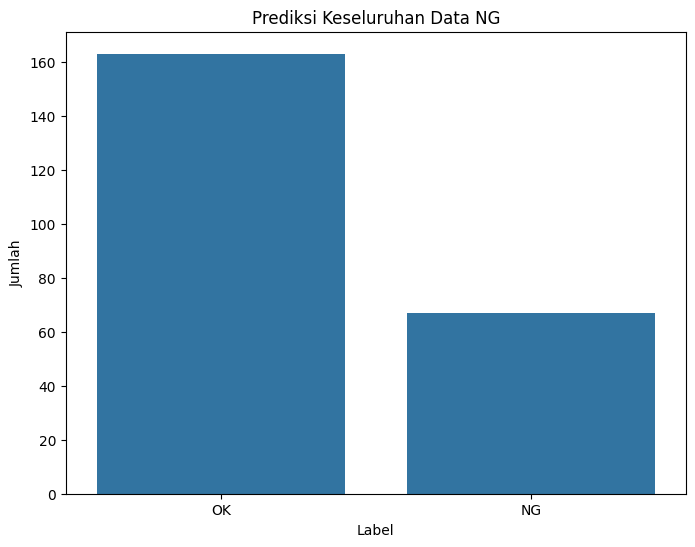

In [76]:
# Hitung jumlah setiap label
label_counts = y.value_counts()

# Membuat plot
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)

# Menambahkan label dan judul
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.title('Prediksi Keseluruhan Data NG')

# Menampilkan plot
plt.show()

**Kesimpulan:**

1. **Prediksi NG tidak akurat** yang mungkin disebabkan karena korelasi setiap fitur terhadap label sangat rendah **0,0...** (tidak ada fitur yang memiliki korelasi kuat dengan label), **model akan kesulitan menemukan pola** untuk memisahkan data. Hal ini menyebabkan data overlap, di mana **distribusi fitur antara kedua kelas sangat mirip**.

2. **Tumpang Tindih** Data (Overlapping Data): Jika distribusi data kelas sangat mirip atau tumpang tindih, model tidak dapat membedakan dengan baik, yang membuat prediksi salah terutama pada kelas minoritas.

3. Ada kemungkinan dari faktor lain dari mesin yang belum diketahui seperti nozzle pengisian, pompa/sistem aliran, ketidaktepatan sensor/aktuator, kondisi wadah, keausan komponen, sistem transportasi wadah, dan lain-lain

Visualisasi & Korelasi dapat dilihat pada https://colab.research.google.com/drive/1VU8NrhhCF9QXNEU2W6quQh4KpV3cSJMt

##Testing Dengan Data Baru No Reject

In [77]:
def submit(model_load, filename="/content/drive/MyDrive/Training Machine Learning/Tugas Akhir/Pengolahan Data/Data Baru/Prediksi Data Baru No Reject.csv"):
    # Baca data baru untuk prediksi
    df_submit = pd.read_excel('/content/drive/MyDrive/Training Machine Learning/Tugas Akhir/Pengolahan Data/Data Baru/Data Baru No Reject.xlsx')

    # Mapping label numerik ke label asli
    label_mapping = {0: 'NG', 1: 'OK'}

    # Prediksi label numerik
    y_pred_numeric = model_load.predict(df_submit)

    # Konversi prediksi ke label asli
    df_submit['label'] = [label_mapping[label] for label in y_pred_numeric]

    # Tambahkan kolom "id" untuk identifikasi baris
    df_submit["id"] = range(len(df_submit))

    # Simpan hasil prediksi ke file CSV
    df_submit[['id', 'label']].to_csv(filename, index=False)

    print(f"Hasil prediksi disimpan di: {filename}")

# Panggil fungsi submit
submit(model_load, filename='/content/drive/MyDrive/Training Machine Learning/Tugas Akhir/Pengolahan Data/Data Baru/Prediksi Data Baru No Reject.csv')

Hasil prediksi disimpan di: /content/drive/MyDrive/Training Machine Learning/Tugas Akhir/Pengolahan Data/Data Baru/Prediksi Data Baru No Reject.csv


In [78]:
result_prediksi = pd.read_csv('/content/drive/MyDrive/Training Machine Learning/Tugas Akhir/Pengolahan Data/Data Baru/Prediksi Data Baru No Reject.csv')

In [79]:
X = result_prediksi.drop(['label'],axis=1)
y = result_prediksi.label
y

,label
0,OK
1,OK
2,NG
3,NG
4,NG
...,...
2553,NG
2554,NG
2555,NG
2556,NG


In [80]:
y.value_counts()

,count
label,
OK,1903
NG,655


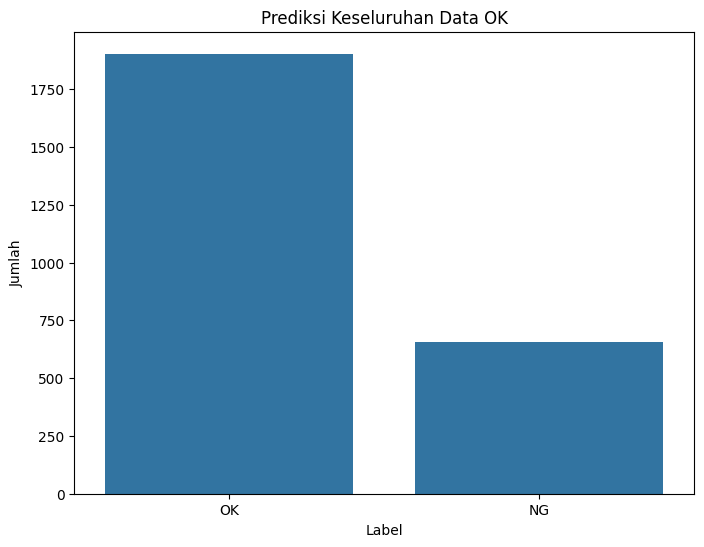

In [81]:
# Hitung jumlah setiap label
label_counts = y.value_counts()

# Membuat plot
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)

# Menambahkan label dan judul
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.title('Prediksi Keseluruhan Data OK')

# Menampilkan plot
plt.show()